In [9]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer

In [10]:
df = pd.read_parquet('./article_embeddings.parquet')

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,article_id
0,-1.263794,1.281396,-0.251072,1.032179,-0.660014,-0.979465,1.158877,-1.277197,-1.042532,-0.883872,...,1.657018,1.963555,0.121184,-0.303891,1.638641,0.150918,-0.287158,-0.866286,0.446353,9766146
1,-0.977751,-0.521731,-0.579084,-0.192308,0.379663,-0.888524,-0.236671,-0.182480,0.539332,0.267008,...,1.342835,1.952400,0.491221,0.062911,1.446828,0.191170,-0.574995,-1.548195,0.896549,9482487
2,-0.601726,1.860758,-1.250586,-0.476165,0.535626,1.166648,-1.090361,-0.417552,0.550306,-0.676987,...,-1.124019,-0.108633,-0.084930,-0.332592,0.024359,0.334809,0.216375,0.271365,-0.002506,9372382
3,-1.364551,-0.027755,-0.966876,0.456625,-0.135123,-0.138371,-0.423364,-2.261641,-0.247666,0.845035,...,1.100277,2.094062,-0.268953,-0.238740,1.555628,0.225782,0.109169,-0.849270,-0.260973,7626006
4,-0.720691,0.259184,-1.198708,-0.239315,-0.341687,0.448452,-1.080775,0.277956,-0.337263,-0.624354,...,1.084454,0.968056,-0.200975,0.074447,1.279993,0.088729,-0.044677,-0.106590,-0.842771,9757717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11772,0.152294,0.577836,0.660833,-0.690454,0.234107,0.549806,-0.875812,-0.529827,0.120053,0.225047,...,-0.906414,-1.018176,-0.322837,0.899105,0.131001,-0.719162,1.531283,0.607252,-0.376933,9299282
11773,-1.165245,0.379723,-0.222216,0.497232,-0.108858,-0.345893,-0.529121,-0.900468,0.281431,0.478364,...,1.547613,2.305619,-0.143672,-0.153898,2.501497,1.260471,0.304247,-0.829808,0.689714,9365376
11774,-1.029496,1.655965,0.156420,0.635809,-0.135958,0.399542,-0.871069,-1.279074,0.571594,-0.884937,...,0.273012,2.157809,-0.575846,0.023263,0.976084,0.185246,-0.257774,-0.282521,0.642119,9412605
11775,-0.713367,1.083257,-0.129209,-0.033016,-0.929274,-0.065766,-1.016981,-0.900940,0.550022,-0.521292,...,0.886399,1.246193,-0.947885,-0.064163,1.561469,0.470702,-0.012974,0.348910,0.658908,9775794


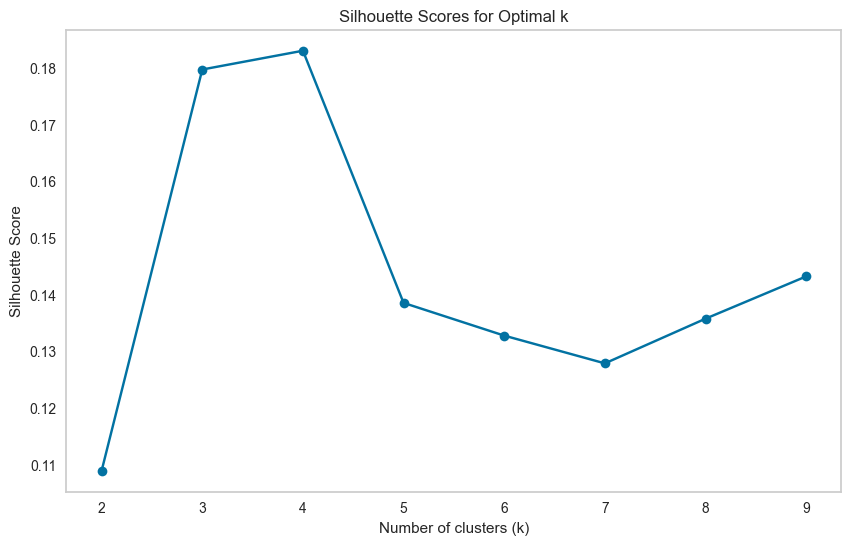

Optimal number of clusters (k) based on silhouette score: 4
   article_id  cluster
0     9766146        0
1     9482487        0
2     9372382        1
3     7626006        0
4     9757717        1
Results saved to clustering_results.parquet


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming `df` is your DataFrame containing the embeddings
# Extract the embedding columns
embedding_columns = df.columns[:-1]  # Exclude the 'article_id' column
X = df[embedding_columns].values  # Get the values for clustering

# Optional: Standardize the embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Determine optimal k using silhouette score
silhouette_scores = []
k_values = range(2, 10)  # Silhouette score is only defined for k >= 2

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Step 2: Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 3: Identify optimal k based on maximum silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k) based on silhouette score: {optimal_k}')

# Step 4: Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Inspect the resulting clusters
print(df[['article_id', 'cluster']].head())

# Step 5: Save results to a Parquet file
output_file = 'clustering_results.parquet'
df[['article_id', 'cluster']].to_parquet(output_file, index=False)

print(f'Results saved to {output_file}')
